<h3>Import libraries </h3>
Libraries are like pandas,matplotlib,seaborn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<h3> Read Swiggy dataset </h3>
load the dataset from local machine by using path of the file

In [5]:
df=pd.read_csv(r"C:\Users\tejas\Downloads\swiggy.csv")
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150,2.9,80,"North Indian,Indian,Snacks",Rohini,28


<h3>  data cleaning </h3>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   int64  
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 678.3+ KB


<h4>Count the number of missing values in each column</h4>

In [7]:
df.isna().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

<h3> check any duplicates are there </h3>

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(8680, 10)

In [10]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

<h3> Renaming the column names like 'Avg ratings' to 'Avg_ratings' </h3>

In [11]:
df.columns=df.columns.str.replace(' ','_')

In [12]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg_ratings',
       'Total_ratings', 'Food_type', 'Address', 'Delivery_time'],
      dtype='object')

In [13]:
df.nunique()

ID               8680
Area              833
City                9
Restaurant       7865
Price             120
Avg_ratings        30
Total_ratings       8
Food_type        3734
Address          2339
Delivery_time      81
dtype: int64

In [14]:
df.describe()

,ID,Price,Avg_ratings,Total_ratings,Delivery_time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [15]:
df['Price'].unique()

array([ 300,  650,  250,  350,  800, 1000,  150,  400,  532,  500,  290,
       1200,  600,  850,  900,  200,  750, 1100,  450,  550,  700, 1500,
       1600,  326, 1400,  100, 1300,  249, 1700,  299,  599,  220,  120,
        193,  499, 1900,  178,  950,  330,    1,   50,  160, 1800, 2000,
          0,  256,  197,  140,  180, 1250,   20,  260,   99,   30,  240,
         80, 1255,  155,  199,  270,  280,   40,  175,  399, 2500,  149,
        230,   70,   48,  190,  275,  380,  289,  325,  159,   49,  360,
        420,  170,  129,  390,    2,  205,  493,  196,  355,  398,  110,
        620,   10,  105,  320,  480,  540,  590,  338,  978,  137,  375,
        126,  384,  251,  151, 1650,   85,   15,   65,  130,   60,  640,
        225,  198,   98,   45,  518,  502,  340,  297,   75,    5],
      dtype=int64)

<h3>If Price is less than 150,filled with 'avg price' for better visualization</h3>

In [16]:
rest_price=df['Price'].value_counts(ascending=False)
rest_price=pd.DataFrame(rest_price).reset_index()
rest_price

,Price,count
0,300,1776
1,200,1774
2,250,968
3,400,838
4,500,605
...,...,...
115,196,1
116,355,1
117,398,1
118,620,1


In [17]:
avg=df['Price'].mean()
avg=int(avg)
avg

348

In [18]:
df['Price'] = df['Price'].apply(lambda x: avg if x < 150 else x)

In [19]:
df[df['Price']==avg]

,ID,Area,City,Restaurant,Price,Avg_ratings,Total_ratings,Food_type,Address,Delivery_time
211,9014,West Marredpally,Hyderabad,Triple A Bakery,348,3.9,100,Italian Bakery,West Marredpally Road,70
220,9215,Bidhannagar,Kolkata,Veg Dhaba,348,4.0,100,"North Indian,Indian,Combo,Chinese,Healthy Food",Salt Lake,58
310,12434,Mumbai,Mumbai,J.J Jalebi,348,3.6,500,"Desserts,Sweets",Lbs Marg,25
392,16561,Purasaiwakkam,Chennai,Tibbs Frankie,348,3.8,100,Fast Food,Purasawalkam,34
574,23490,Machuabazar,Kolkata,Royal Spoon,348,4.1,1000,Chinese,Near Hedua Park,43
...,...,...,...,...,...,...,...,...,...,...
8648,457630,Jayanagar,Bangalore,Sri Sai Foods,348,2.9,80,South Indian,Jayanagar,56
8652,459016,Athwa,Surat,Punjabi Masi Da Dhaba,348,2.9,80,"Punjabi,North Indian",Athwa,32
8657,460163,Vastrapur,Ahmedabad,Sm Food,348,2.9,80,"American,Snacks",Vastrapur,48
8659,460439,Navrangpura,Ahmedabad,Dhosa Hub,348,2.9,80,"South Indian,North Indian",Navrangpura,44


# DATA ANALYSIS AND VISUALIZATION 

<h2>Find the city which has more restaurants and visualize the data with pie chart for better understanding.</h2>

In [20]:
city_restaurant_counts = df['City'].value_counts()
city_restaurant_counts

# Find the city with the most restaurants
city_with_most_restaurants = city_restaurant_counts.idxmax()
num_restaurants_in_most_city = city_restaurant_counts.max()
print(f"{city_with_most_restaurants} with {num_restaurants_in_most_city} restaurants.")
print(city_restaurant_counts)

Kolkata with 1346 restaurants.
City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: count, dtype: int64


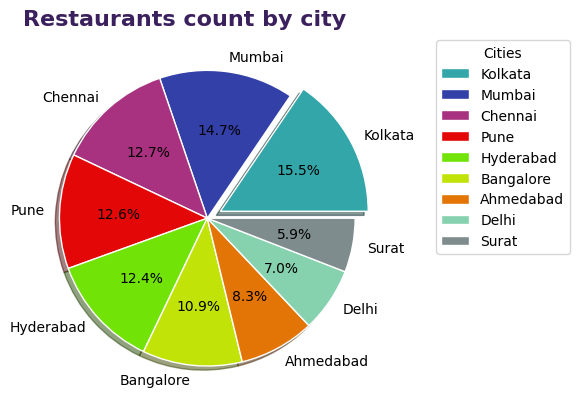

In [21]:
city_restaurant_counts = df['City'].value_counts()
slices=city_restaurant_counts
labels=city_restaurant_counts.index
colors = ['#32a6a8', '#3240a8', '#a8327f', '#e30707', '#71e307', '#c2e307', '#e37507', '#86d1ae', '#7f8c8d']
explode=[0.1,0,0,0,0,0,0,0,0]
wedges, texts, autotexts = plt.pie(slices, labels=labels, colors=colors, autopct='%1.1f%%',explode=explode, wedgeprops={'edgecolor':'white'},shadow=True)
plt.legend(wedges, labels, title='Cities', loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Restaurants count by city",fontsize=16, fontweight='bold', color='#3b205e', loc='left')
plt.show()

<h2> Which restaurant has more food_items in their menu </h2>

In [22]:
# split the food_type and find len of list_of_foods
menu=df['Food_type'].str.split(",").apply(len)
menu_df=pd.DataFrame(menu).reset_index()

# Select only unique restaurants
unique_restaurants = df['Restaurant'].drop_duplicates()
restaurant_df=pd.DataFrame(unique_restaurants).reset_index()
restaurant_df

# merging two dataframes according to index column
res=menu_df.merge(restaurant_df,on="index")

# we get top 10 restaurants which has more food items in menu
res_df=res.sort_values(by='Food_type',ascending=False).head(10)
res_df.rename(columns={'Food_type':'Count_of_foods_in_menu'},inplace=True)
res_df

,index,Count_of_foods_in_menu,Restaurant
2219,2376,20,The Bowl Life
2220,2377,20,Bowlsome
7645,8448,18,Meal Station
2278,2455,18,The Biryani Experiment
1682,1798,18,Combo Stories By 10D Express
5845,6428,17,Fast Filling - Allenby Road
6965,7652,17,Desi Videsi - The Road Side Lounge
2825,3074,17,That Pizza Place
1208,1295,17,Homely
165,168,16,Freshmenu


<h4> Bar Plot using seaborn </h4>

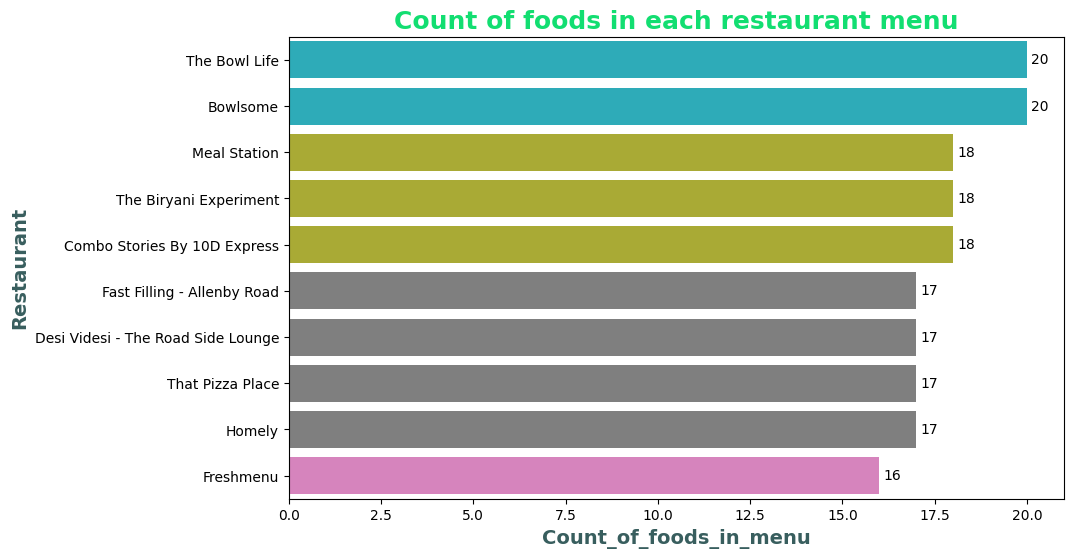

In [57]:
plt.figure(figsize=(10, 6))
custom_colors = [ '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax=sns.barplot(y=res_df['Restaurant'],x=res_df['Count_of_foods_in_menu'], hue='Count_of_foods_in_menu', data=res_df, palette=custom_colors,legend=False)

plt.title('Count of foods in each restaurant menu',fontsize=18, fontweight='bold', color='#12de71')
plt.xlabel('Count_of_foods_in_menu',fontsize=14, fontweight='bold', color='#385e5e')
plt.ylabel('Restaurant',fontsize=14, fontweight='bold', color='#385e5e')
for val in ax.containers:
    ax.bar_label(val, label_type='edge', fontsize=10, color='black', padding=3)

plt.show()

<h2> Restaurant count by each Area </h2>  

In [24]:
area_restaurant_counts=df['Area'].value_counts()
area_restaurant_counts

Area
Rohini                    257
Chembur                   208
Kothrud                   149
Andheri East              135
Navrangpura               132
                         ... 
Shakurpur                   1
Magob                       1
Bosepukur                   1
Ambegaon                    1
Panjarapole Cross Road      1
Name: count, Length: 833, dtype: int64


<h2>Count the restaurants which are available on perticular price</h2>

In [25]:
df['Price'].value_counts()


Price
300    1776
200    1774
250     968
400     838
500     605
       ... 
390       1
205       1
493       1
196       1
297       1
Name: count, Length: 90, dtype: int64

<h4>Histogram analysis on Price </h4>

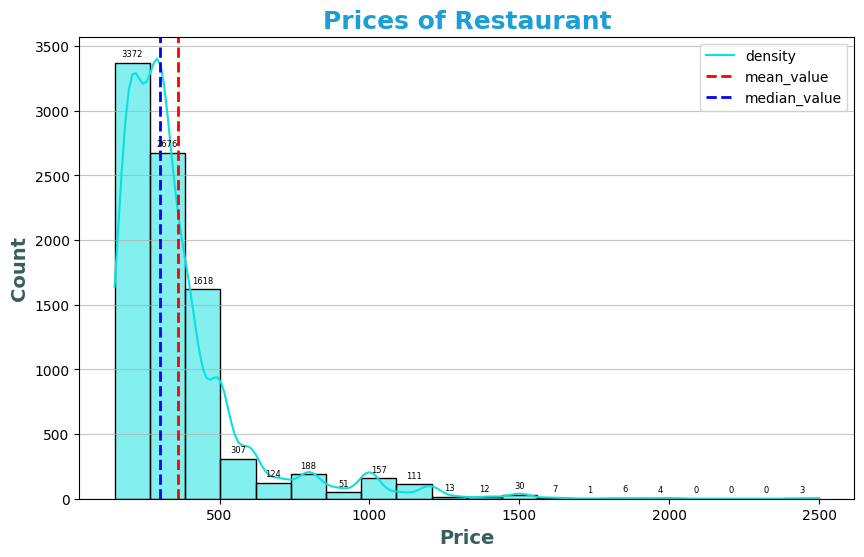

In [152]:
mean_value=df['Price'].mean()
median_value=df['Price'].median()

plt.figure(figsize=(10, 6))
ax=sns.histplot(df['Price'], bins=20,kde=True,  color='#09e0e0', edgecolor='black')

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2,label='Mean')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.legend(['density','mean_value','median_value'])

plt.title('Prices of Restaurant',fontsize=18, fontweight='bold', color='#1c9ed6')
plt.xlabel('Price',fontsize=14, fontweight='bold', color='#385e5e')
plt.ylabel('Count',fontsize=14, fontweight='bold', color='#385e5e')
plt.grid(axis='y', alpha=0.75)

for val in ax.containers:
    ax.bar_label(val, label_type='edge', fontsize=6, color='black', padding=3)
plt.show()

<h2>Find the restaurants which included 'Biryani' in menu</h2>

In [78]:
# contains biryani
biryani_food_type=df[df['Food_type'].str.contains('Biryani')]

biryani_food_type.sort_values(by='Price',ascending=False)
biryani_food_type

,ID,Area,City,Restaurant,Price,Avg_ratings,Total_ratings,Food_type,Address,Delivery_time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
12,453,Pulikeshi Nagar,Bangalore,Chichabas Taj,532,4.2,100,"Mughlai,North Indian,Biryani",Mm Road,54
14,504,Kodihalli,Bangalore,Kaati Zone Rolls & Wraps,150,4.3,100,"Fast Food,Beverages,Bengali,Biryani,Indian,Nor...",Domlur Layout,59
18,1050,Jayanagar,Bangalore,Nagarjuna Chimney,800,4.2,1000,"Seafood,Andhra,Biryani,South Indian,Combo,Dess...",3Rd Block,48
22,1547,Masab Tank,Hyderabad,Dine Hill,400,4.1,500,"Arabian,Biryani,North Indian,Chinese",Ahmed Nagar,49
...,...,...,...,...,...,...,...,...,...,...
8539,446052,Marol Sakinaka,Mumbai,Sai Gopi Pure Veg,300,2.9,80,"Indian,South Indian,Biryani,Chinese,Combo,Fast...",Marol Sakinaka,43
8544,446961,Nallakunta & Vidyanagar,Hyderabad,Durga'S Street Delight'S,200,2.9,80,"Chinese,North Indian,Biryani",Nallakunta & Vidyanagar,41
8609,452890,Santoshnagar & Saidabad,Hyderabad,Hotel Sahara,200,2.9,80,"South Indian,Chinese,Biryani",Santoshnagar & Saidabad,43
8616,454341,Kodambakkam,Chennai,Rice Junction / Chinthamani Foods Chennai Private,250,2.9,80,"Biryani,Indian",Kodambakkam,68


<h2> Top 5 ordered food types </h2>

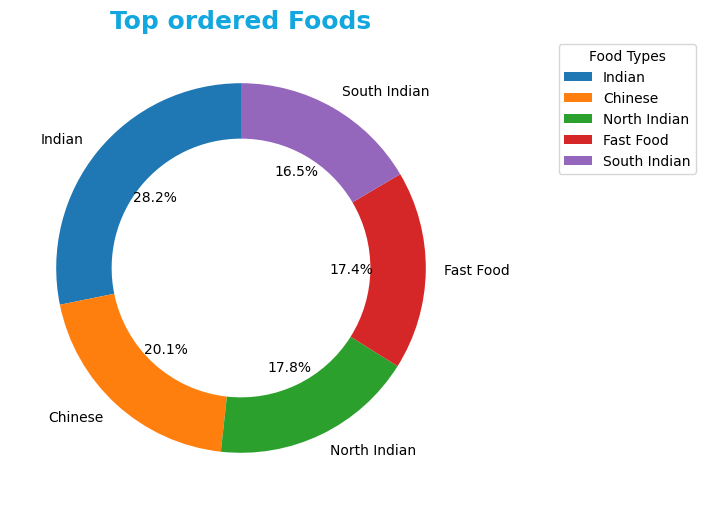

In [59]:
food_type_counts = df['Food_type'].value_counts().head(5)
plt.figure(figsize=(6, 6))
slices=food_type_counts
labels=food_type_counts.index
wedges, texts, autotexts=plt.pie(slices, labels=labels, autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.3))
plt.title('Top ordered Foods',color='#12a7de',fontsize=18,fontweight='bold')
plt.legend(wedges,labels, title='Food Types', loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

<h2> Top 10 Fast delivery restaurants </h2>

In [153]:
fast_delivery = df.groupby(['Delivery_time', 'Restaurant']).size().reset_index(name='rest_count')
fast_delivery = fast_delivery.sort_values(by=['Delivery_time', 'rest_count'], ascending=[True, False])
fast_delivery.head(10)

,Delivery_time,Restaurant,rest_count
0,20,Scoops,1
1,21,Wah Ji Wah ( Budhvihar),1
2,22,Sarvottam Restaurant,1
3,23,Hotel Niagara,1
4,23,Nic Natural Ice Creams,1
5,24,Apsara Ice Creams,1
6,24,Famous Ice Cream,1
7,24,Grameen Kulfi,1
8,24,Grand Hotel,1
9,24,Jalaram Khichdi,1


<h2> Most popular food items in each city </h2>

In [75]:
popular_food_types = df.groupby(['City', 'Food_type'])['ID'].count().reset_index()
popular_food_types = popular_food_types.sort_values(by=['City', 'ID'], ascending=[True, False])
popular_food_types = popular_food_types.drop_duplicates(subset='City')
popular_food_types.rename(columns={'ID':'Food_count'},inplace=True)
popular_food_types

,City,Food_type,Food_count
172,Ahmedabad,Indian,53
977,Bangalore,South Indian,32
1402,Chennai,Indian,56
1952,Delhi,North Indian,47
2623,Hyderabad,South Indian,76
3113,Kolkata,Indian,66
3601,Mumbai,Chinese,64
4347,Pune,Chinese,48
4930,Surat,Fast Food,40


<h4> CREATE A BAR PLOT ON MOST POPULAR FOOD TYPES USING 'MATPLOTLIB'</h4>

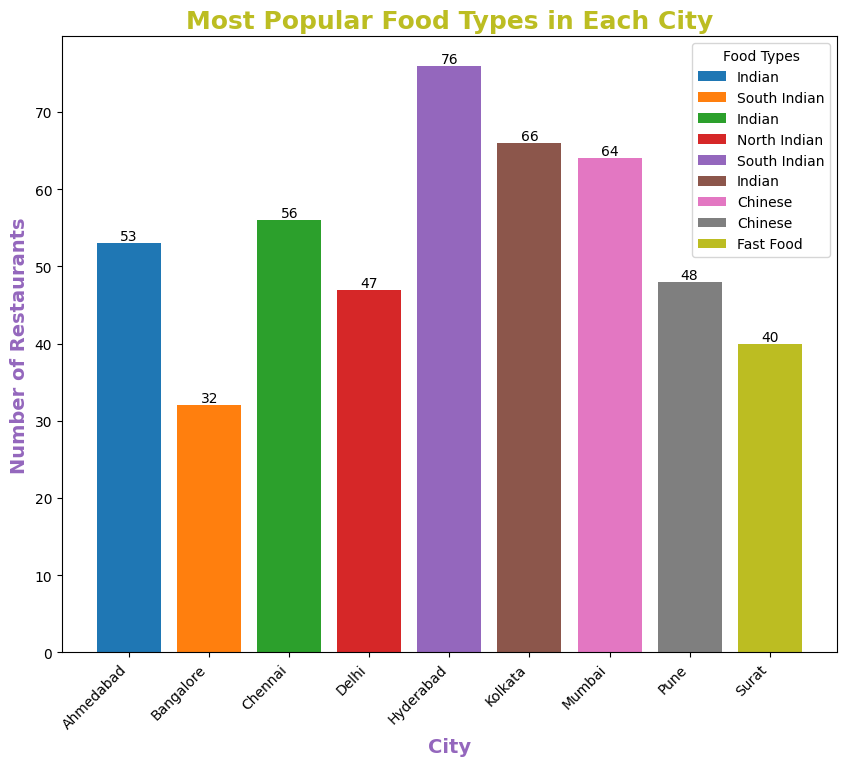

In [155]:
x=popular_food_types['City']
y=popular_food_types['Food_count']
plt.figure(figsize=(10, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
food_types=popular_food_types['Food_type']
plt.bar(x,y,color=colors,label=food_types)
plt.title('Most Popular Food Types in Each City',fontsize=18, fontweight='bold', color='#bcbd22')
plt.xlabel('City',fontsize=14, fontweight='bold', color='#9467bd')
plt.ylabel('Number of Restaurants',fontsize=14, fontweight='bold', color='#9467bd')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Food Types', bbox_to_anchor=(1, 1))
for index, value in enumerate(y):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black', fontweight=40,fontsize=10)
plt.show()

<h2> extract chineese food restaurants with address and price </h2>

In [33]:
chinese_food=df['Food_type'].str.count('Chinese')
rest=df.loc[chinese_food==1,['City','Area','Address','Restaurant','Price']]
rest=rest.query('Price<1000 & Price>200').reset_index(drop=True)
rest

,City,Area,Address,Restaurant,Price
0,Bangalore,Koramangala,5Th Block,Tandoor Hut,300
1,Bangalore,Jogupalya,Double Road,Kim Lee,650
2,Bangalore,Indiranagar,80 Feet Road,New Punjabi Hotel,250
3,Bangalore,Domlur,Double Road,Tea Brew,350
4,Bangalore,Koramangala,5Th Block,Bamey'S Restro Cafe,400
...,...,...,...,...,...
2141,Ahmedabad,Paldi & Ambawadi,Maninagar,Rr Kloud Kitchen,500
2142,Delhi,Nsp,Nsp,New Oye Punjabi,350
2143,Pune,Bibwewadi,Dhankawadi,Krishna Pure Veg,300
2144,Mumbai,Ghatkopar Vikhroli,Ghatkopar Vikhroli,Tj'S Kitchen,300


<h2>Counts of South Indian and North Indian Restaurants in Each City </h2> 

In [159]:
south_indian=df[df['Food_type']=='South Indian']
south_indian=south_indian["City"].value_counts().reset_index(name='Rest_count')
north_indian=df[df['Food_type']=='North Indian']
north_indian=north_indian["City"].value_counts().reset_index(name='Rest_count')
print(north_indian)
print(south_indian)

        City  Rest_count
0      Delhi          47
1       Pune          40
2  Ahmedabad          30
3     Mumbai          29
4  Bangalore          25
5    Kolkata          23
6      Surat          18
7  Hyderabad          18
8    Chennai          16
        City  Rest_count
0  Hyderabad          76
1    Chennai          49
2  Bangalore          32
3    Kolkata          24
4     Mumbai          13
5  Ahmedabad          13
6       Pune           9
7      Surat           9
8      Delhi           3


<h4> Plotting on North and South indian Food</h4>

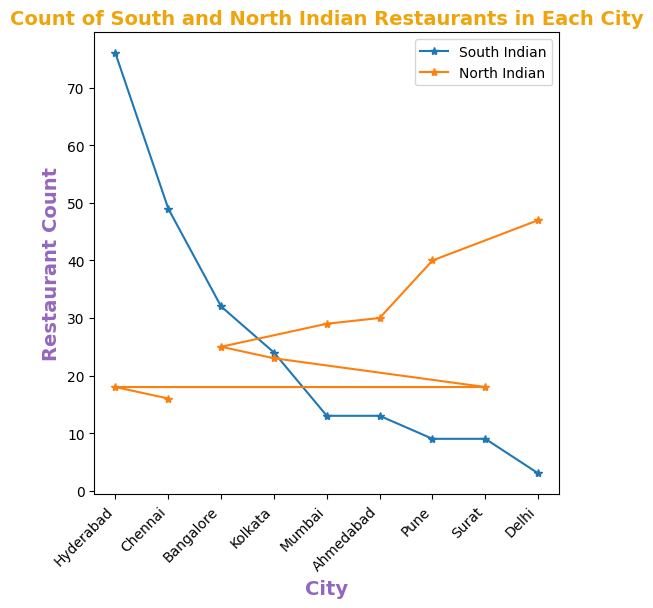

In [163]:
x1=south_indian['City']
x2=north_indian['City']
y1=south_indian['Rest_count']
y2=north_indian['Rest_count']
plt.figure(figsize=(6, 6))
plt.plot(x1,y1,label='South Indian',marker="*")
plt.plot(x2,y2,label='North Indian',marker="*")

plt.title('Count of South and North Indian Restaurants in Each City',fontsize=14, fontweight='bold', color='#f0a40c')
plt.xlabel('City',fontsize=14, fontweight='bold', color='#9467bd')
plt.ylabel('Restaurant Count',fontsize=14, fontweight='bold', color='#9467bd')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

<h2> Restaurants which are having morethan 1 branch in different cities</h2>

In [36]:
restaurant_count=df['Restaurant'].value_counts().reset_index(name='rest_count')
repated_restaurants=restaurant_count[restaurant_count['rest_count']>1]
repated_restaurants

,Restaurant,rest_count
0,La Pino'Z Pizza,13
1,Nic Natural Ice Creams,10
2,Baskin Robbins,10
3,Subway,10
4,Kfc,9
...,...,...
411,Lucky'S Biryani House,2
412,Biryani Blues,2
413,Mini Punjab,2
414,10 Downing Street,2


<h3> We can observe here 'La Pino'Z Pizza' having more brances in different cities</h3>

In [37]:
restaurants_branches=df[df['Restaurant']=="La Pino'Z Pizza"]
restaurants_branches.loc[:,['City','Restaurant','Price','Avg_ratings']]

,City,Restaurant,Price,Avg_ratings
2086,Hyderabad,La Pino'Z Pizza,300,4.0
2420,Delhi,La Pino'Z Pizza,500,3.9
3612,Kolkata,La Pino'Z Pizza,300,4.1
4547,Mumbai,La Pino'Z Pizza,300,4.0
4875,Hyderabad,La Pino'Z Pizza,400,4.0
4908,Ahmedabad,La Pino'Z Pizza,400,4.3
4990,Chennai,La Pino'Z Pizza,300,4.2
5363,Bangalore,La Pino'Z Pizza,220,3.9
7442,Surat,La Pino'Z Pizza,300,4.2
7868,Surat,La Pino'Z Pizza,300,4.3


<h2> Food_type and it's mean of avg_rating </h2>

In [38]:
avg_ratings_by_food_type =df.groupby('Food_type')['Avg_ratings'].mean().round(2)
avg_ratings_by_food_type.reset_index()


,Food_type,Avg_ratings
0,"Afghani,Arabian,Indian,Tandoor",4.30
1,"Afghani,Biryani",4.30
2,"Afghani,Mughlai",2.90
3,American,4.18
4,American Beverages Fast Food,4.30
...,...,...
3729,"Tibetan,Lebanese,Fast Food,Tandoor",4.20
3730,"Tribal,Seafood,Chinese",4.30
3731,Turkish,2.87
3732,"Turkish,Arabian",3.20


<h2> Count of Avg_rating by Price </h2>

In [97]:
df.groupby(['Price','Avg_ratings']).size()

Price  Avg_ratings
150    2.2              2
       2.7              1
       2.9            157
       3.1              5
       3.2              5
                     ... 
2000   4.4              1
       4.5              1
2500   4.1              1
       4.4              1
       4.5              1
Length: 506, dtype: int64

<h4> Scatter plot of 'Avg ratings' vs. 'Price' </h4>

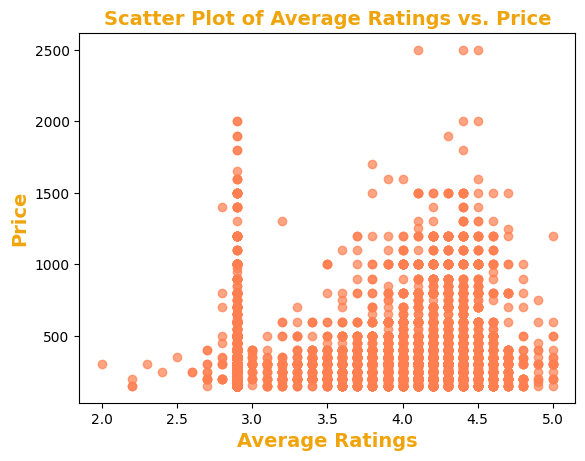

In [92]:
plt.scatter(df['Avg_ratings'], df['Price'], color='coral', alpha=0.7)
plt.title('Scatter Plot of Average Ratings vs. Price',fontsize=14, fontweight='bold', color='#f0a40c')
plt.xlabel('Average Ratings',fontsize=14, fontweight='bold', color='#f0a40c')
plt.ylabel('Price',fontsize=14, fontweight='bold', color='#f0a40c')
plt.show()

<h2> Group by 'Area' and find the maximum 'Total ratings' within each area </h2>

In [41]:
max_ratings_by_area = df.groupby('Area')['Total_ratings'].max()
max_ratings_by_area.reset_index()

,Area,Total_ratings
0,Akhbar Nagar Circle,80
1,Begumpet,80
2,26,100
3,3Rd Block Jayanagar,1000
4,A Unit Of M/S Cohort Ruby Area,500
...,...,...
828,Yamuna Nagar,100
829,Yerawada,80
830,Yoginagar Society,100
831,Yousufguda,50


<h2> Filtered restaurants based on 'City','Food_type' and 'Avg_ratings' </h2>

Get the restaurants which has rating above '4.0' and 'south indian' food in hyderabad

In [42]:
filtered_data = df[(df['Food_type'] == 'South Indian') & (df['Avg_ratings'] > 4.0) &(df['City']=='Hyderabad') ]
filtered_data.sort_values(by='Avg_ratings',ascending=False)

,ID,Area,City,Restaurant,Price,Avg_ratings,Total_ratings,Food_type,Address,Delivery_time
2158,184256,Jubilee Hills,Hyderabad,Panchakattu Dosa,348,4.5,500,South Indian,Banjara Hills,73
2350,214964,Asif Nagar,Hyderabad,Lingaiah Hotel,200,4.5,100,South Indian,Mallepally,33
8034,329070,Abids,Hyderabad,Kamath Hotel,200,4.4,500,South Indian,Abids & Koti,29
7248,80378,Takara Basthi,Hyderabad,Hotel Shri Raghavendra Pure Veg,200,4.4,50,South Indian,Monda Market,52
7222,77543,Habsiguda,Hyderabad,Hotel Suprabhat,200,4.3,1000,South Indian,Habsiguda X Roads,51
7194,73758,Ameerpet,Hyderabad,Sai Darshini Tiffins,150,4.3,1000,South Indian,Czech Colony,59
7011,56740,West Marredpally,Hyderabad,Geetha Tiffins,150,4.3,1000,South Indian,Infront Of Geetha Nursing Home,64
1825,133012,Dilsukhnagar,Hyderabad,Sahadeva Reddy'S Southern Spice,200,4.3,500,South Indian,Kothapet & Dilsukhnagar,38
6708,30592,Kachiguda,Hyderabad,Sri Amul Tiffins Centre,200,4.3,20,South Indian,Badi Chowdi,32
6635,22986,Nampally,Hyderabad,Lakshman Ki Bandi,150,4.3,100,South Indian,Ghoshamahal,36


 <h2> Which Restaurant has highest avg_rating in each city </h2>

In [43]:
max_avg_ratings_by_city = df.loc[df.groupby('City')['Avg_ratings'].idxmax()]

max_avg_ratings_by_city[['City', 'Restaurant', 'Avg_ratings']]


,City,Restaurant,Avg_ratings
6010,Ahmedabad,Ching Chong Chinese,4.8
5936,Bangalore,Tricky Shakes,5.0
6390,Chennai,Nasi And Mee,5.0
6297,Delhi,Fat Tiger,5.0
5798,Hyderabad,Wallonia Waffle Co.,5.0
8439,Kolkata,Keventers Ice Creamery,5.0
3894,Mumbai,Diamond Market Pizza Jp,5.0
5684,Pune,Papacream,5.0
1741,Surat,Sobis Diet Farm,4.8


<h4> Plotting the barplot on above data </h4>

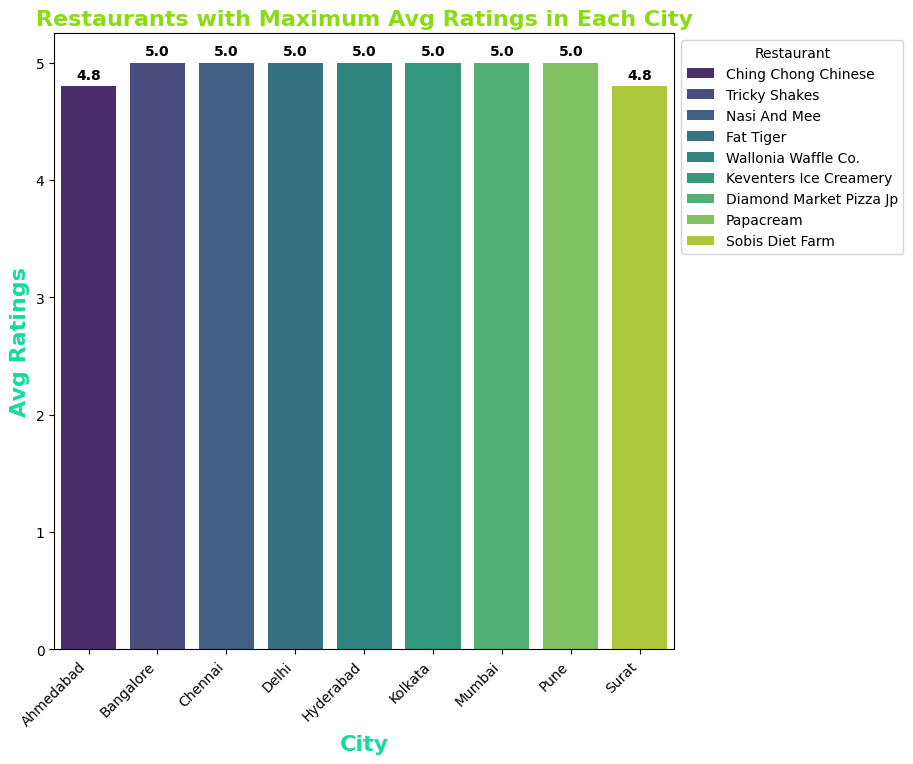

In [44]:
plt.figure(figsize=(8, 8))
ax=sns.barplot(x='City', y='Avg_ratings', hue='Restaurant', data=max_avg_ratings_by_city, palette='viridis')
plt.title('Restaurants with Maximum Avg Ratings in Each City',fontsize=16, fontweight='bold', color='#8bdb14')
plt.xlabel('City',fontsize=16, fontweight='bold', color='#14db9f')
plt.ylabel('Avg Ratings',fontsize=16, fontweight='bold', color='#14db9f')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Restaurant', bbox_to_anchor=(1, 1))

for val in ax.containers:
    ax.bar_label(val, fmt='%.1f', label_type='edge', fontsize=10, color='black', weight='bold', padding=3)


<h2>Food_type and it's avg_rating </h2>

In [45]:
avg_ratings_by_food_type =df.groupby('Food_type')['Avg_ratings'].mean().round(2)
avg_ratings_by_food_type.reset_index()

,Food_type,Avg_ratings
0,"Afghani,Arabian,Indian,Tandoor",4.30
1,"Afghani,Biryani",4.30
2,"Afghani,Mughlai",2.90
3,American,4.18
4,American Beverages Fast Food,4.30
...,...,...
3729,"Tibetan,Lebanese,Fast Food,Tandoor",4.20
3730,"Tribal,Seafood,Chinese",4.30
3731,Turkish,2.87
3732,"Turkish,Arabian",3.20


<h2> Most ordered Food by Price </h2>

In [46]:
price_range_counts = df['Price'].value_counts().head(10).reset_index(name="Food_count")
price_range_counts

,Price,Food_count
0,300,1776
1,200,1774
2,250,968
3,400,838
4,500,605
5,150,497
6,350,408
7,348,400
8,600,262
9,450,158


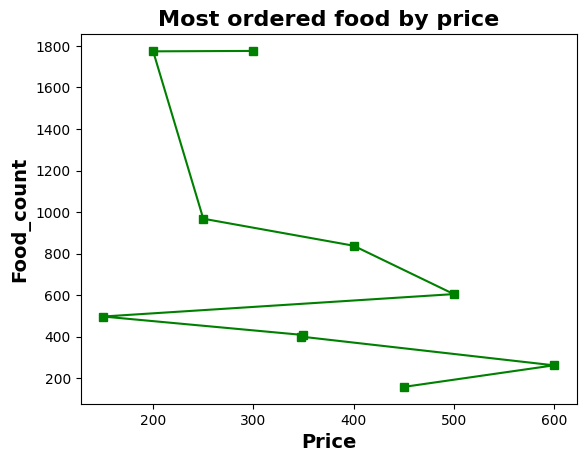

In [122]:
x=price_range_counts['Price']
y=price_range_counts['Food_count']
plt.plot(x,y, color='green',marker="s")
plt.xlabel('Price',fontsize=14, fontweight='bold', color='black')
plt.ylabel('Food_count',fontsize=14, fontweight='bold', color='black')
plt.title('Most ordered food by price',fontsize=16, fontweight='bold', color='black')
plt.show()

<h3>Restaurants based on Avg_Rating</h3>

In [48]:
above_45_ratings = df[df['Avg_ratings'] > 4.5]
below_45_ratings = df[df['Avg_ratings'] <= 4.5]
above_45_ratings=above_45_ratings['Restaurant'].value_counts().drop_duplicates().reset_index()
below_45_ratings=below_45_ratings['Restaurant'].value_counts().drop_duplicates().reset_index()
print(above_45_ratings)
print("........................................................................")
print(below_45_ratings)


                                          Restaurant  count
0                                  Natural Ice Cream      6
1                             Keventers Ice Creamery      4
2  The Grand Sweets And Snacks - Amirtham Restaurant      3
3                                       Nasi And Mee      2
4                            Shree Krishna Juice Bar      1
........................................................................
                                   Restaurant  count
0                             La Pino'Z Pizza     13
1                                      Subway     10
2                            Oven Story Pizza      9
3   Gourmet Ice Cream Cakes By Baskin Robbins      8
4                             Cafe Coffee Day      7
5                      The Biryani Experiment      6
6                                      Eatfit      5
7                                     Barista      4
8               Artinci - Indulge Guilt Free!      3
9                                 Haa

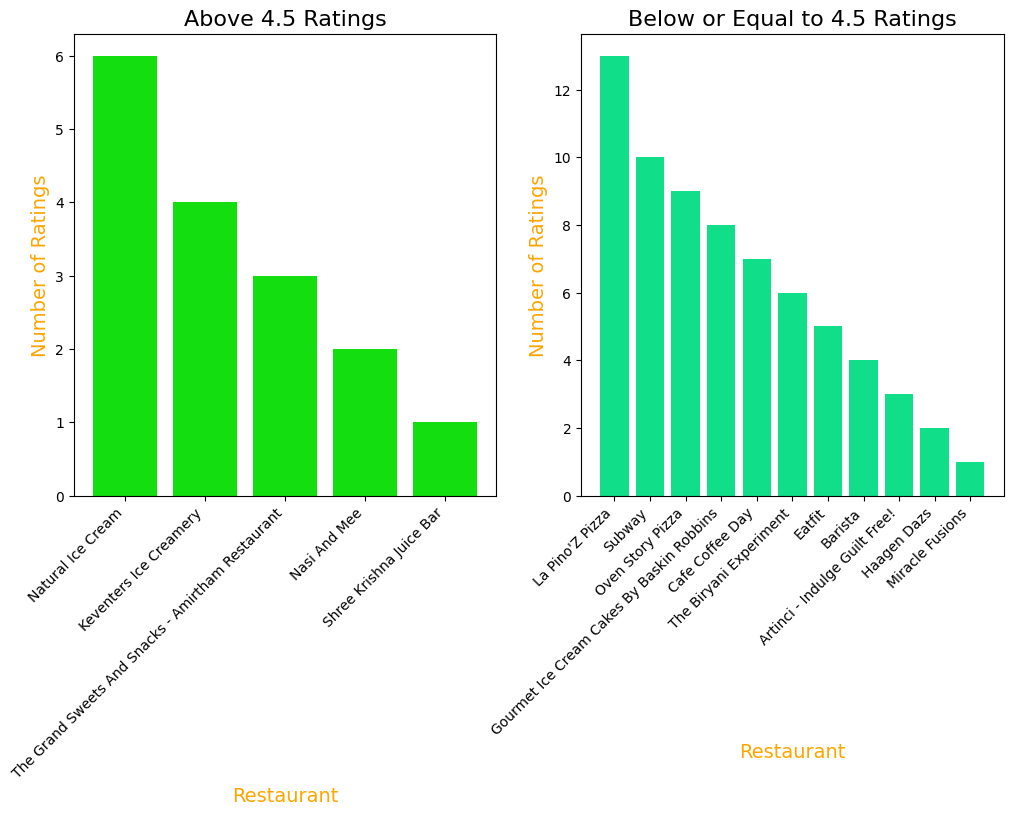

In [132]:
plt.figure(figsize=(12, 6))
x1=above_45_ratings['count']
y1=above_45_ratings['Restaurant']
# Plot for restaurants with average ratings above 4.5
plt.subplot(1, 2, 1)
plt.bar(y1,x1 , color='#13de10')
plt.title('Above 4.5 Ratings',fontsize=16, fontweight=500, color='black')
plt.xlabel('Restaurant',fontsize=14, fontweight=400, color='orange')
plt.ylabel('Number of Ratings',fontsize=14, fontweight=400, color='orange')
plt.xticks(rotation=45, ha='right')


x2=below_45_ratings['count']
y2=below_45_ratings['Restaurant']
# Plot for restaurants with average ratings below or equal to 4.5
plt.subplot(1, 2, 2)
plt.bar(y2,x2 ,color='#10de88')
plt.title('Below or Equal to 4.5 Ratings',fontsize=16, fontweight=500, color='black')
plt.xlabel('Restaurant',fontsize=14, fontweight=400, color='orange')
plt.ylabel('Number of Ratings',fontsize=14, fontweight=400, color='orange')
plt.xticks(rotation=45, ha='right')
plt.show()

<h2> Count of Restaurants by Total Ratings </h2>

In [165]:
desc=df.sort_values(by='Total_ratings',ascending=False)
count_ratings=desc['Total_ratings'].value_counts().reset_index(name='rest_count')
count_ratings=count_ratings.sort_values(by='rest_count',ascending=False)
count_ratings

,Total_ratings,rest_count
0,80,3273
1,100,1987
2,20,1440
3,50,985
4,500,568
5,1000,407
6,5000,14
7,10000,6


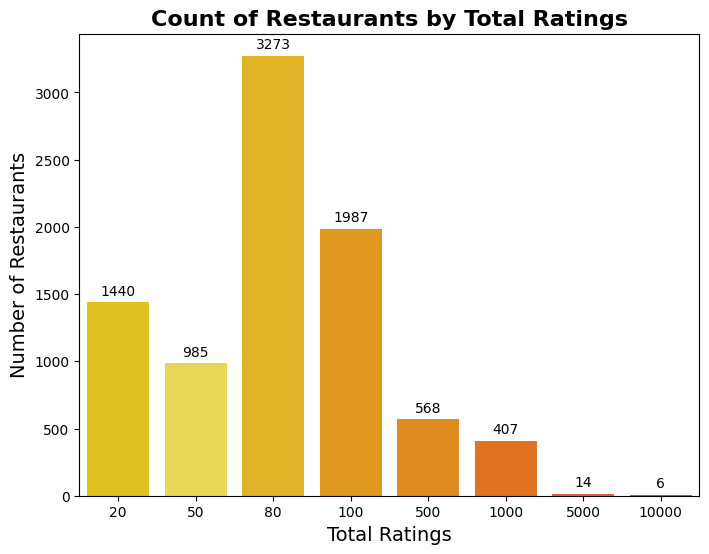

In [166]:
plt.figure(figsize=(8, 6))
colors=['#FFD700', '#FFEB3B', '#FFC107', '#FFA000', '#FF8F00', '#FF6F00', '#FF5722', '#E64A19']
ax=sns.barplot(x=count_ratings['Total_ratings'], y=count_ratings['rest_count'], data=count_ratings, palette=colors,hue='Total_ratings',legend=False)
plt.title('Count of Restaurants by Total Ratings',fontsize=16, fontweight=600, color='black')
plt.xlabel('Total Ratings',fontsize=14, fontweight=400, color='black')
plt.ylabel('Number of Restaurants',fontsize=14, fontweight=400, color='black')
for val in ax.containers:
    ax.bar_label(val, label_type='edge', fontsize=10, color='black', padding=3)

<h2> Count on 'Avg_ratings' based on 'Total_ratings' </h2>

In [142]:
df.groupby(['Avg_ratings','Total_ratings']).size()

Avg_ratings  Total_ratings
2.0          20                1
2.2          20                2
             50                1
2.3          20                1
2.4          20                1
                              ..
4.8          100               5
             500               1
4.9          20               15
5.0          20               17
             50                1
Length: 113, dtype: int64

<h4> Scatter Plot on Avg_ratings Vs Total_ratings </h4>

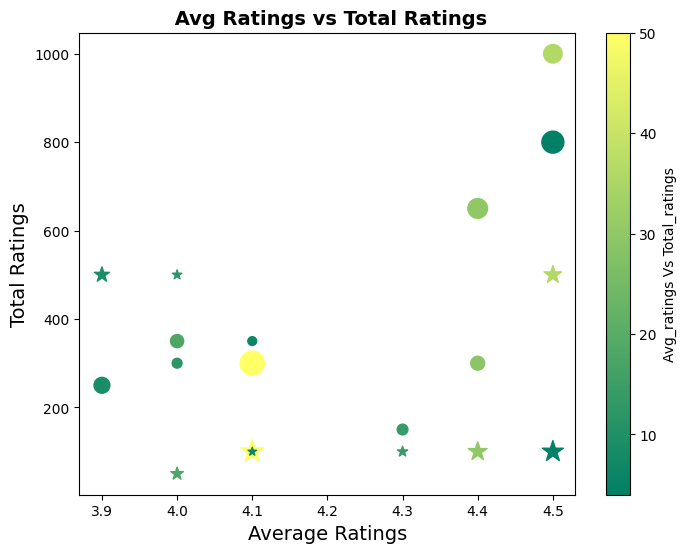

In [138]:

plt.figure(figsize=(8, 6))
colors=[29,50,30,9,18,4,36,14,6,12]
size=[100,300,200,130,90,250,178,60,40,50]
plt.scatter(df['Avg_ratings'].head(10), df['Total_ratings'].head(10),c=colors,cmap='summer',s=size,marker='*')
plt.scatter(df['Avg_ratings'].head(10), df['Price'].head(10),c=colors,cmap='summer',s=size)
cbar=plt.colorbar()
cbar.set_label('Avg_ratings Vs Total_ratings')

plt.title(' Avg Ratings vs Total Ratings',fontsize=14, fontweight='bold', color='black')
plt.xlabel('Average Ratings',fontsize=14, fontweight=400, color='black')
plt.ylabel('Total Ratings',fontsize=14, fontweight=400, color='black')

plt.show()

<h2> Histogram analysis on Average_ratings</h2>

In [154]:
df['Avg_ratings'].value_counts()

Avg_ratings
2.9    3279
4.3     792
4.2     754
4.1     700
4.4     573
4.0     524
3.9     421
4.5     338
3.8     313
3.7     207
4.6     166
3.6     118
4.7      96
3.5      95
3.4      60
3.3      51
3.2      45
4.8      29
3.1      26
3.0      25
5.0      18
2.8      15
4.9      15
2.7      11
2.2       3
2.6       2
2.5       1
2.3       1
2.0       1
2.4       1
Name: count, dtype: int64

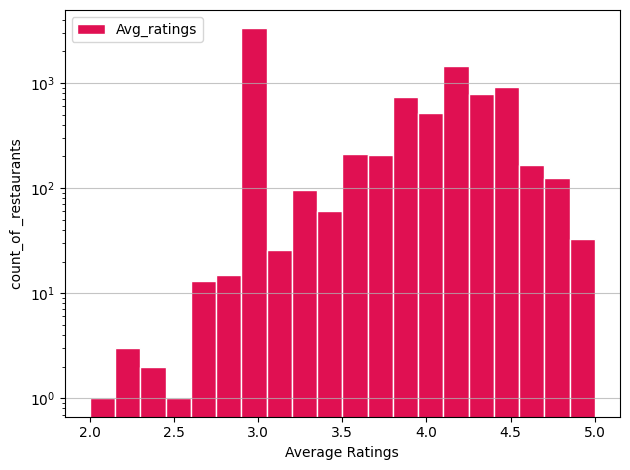

In [167]:
random_colors = np.random.rand(3)
plt.hist(df['Avg_ratings'], bins=20, color='#e01052', edgecolor='white',log=True,label='Avg_ratings')
# plt.title('Histogram of Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('count_of _restaurants')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

<h2> Restaurants count by city using countplot</h2>

In [136]:
df.groupby('City')['Restaurant'].size()

City
Ahmedabad     717
Bangalore     946
Chennai      1106
Delhi         611
Hyderabad    1075
Kolkata      1346
Mumbai       1277
Pune         1090
Surat         512
Name: Restaurant, dtype: int64

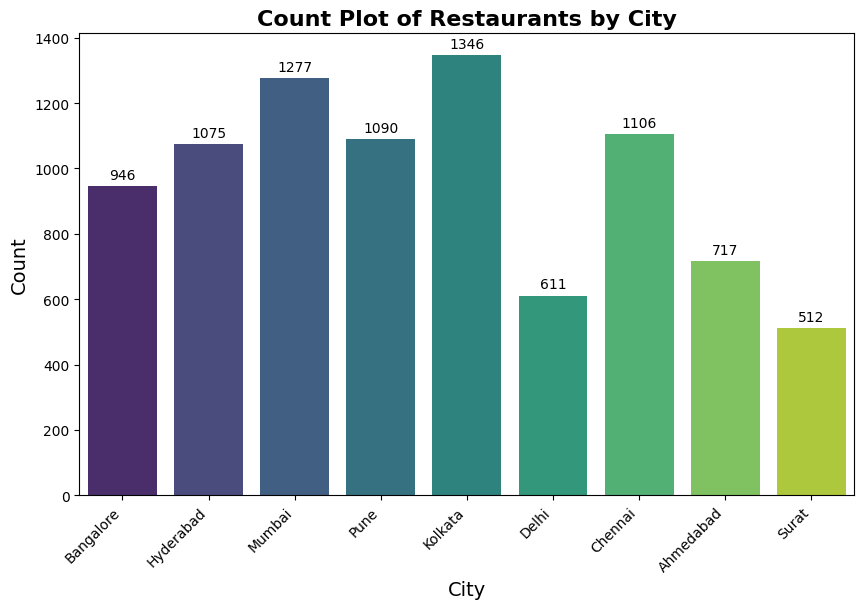

In [135]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='City', data=df, palette='viridis',hue='City')
plt.title('Count Plot of Restaurants by City',fontsize=16, fontweight='bold', color='black')
plt.xlabel('City',fontsize=14, fontweight=400, color='black')
plt.ylabel('Count',fontsize=14, fontweight=400, color='black')
plt.xticks(rotation=45, ha='right') 
for val in ax.containers:
    ax.bar_label(val, label_type='edge', fontsize=10, color='black', padding=3)
plt.show()

<h1> Data Analysis </h1>

<li>DATASET: Swiggy Dataset</li>
<li>COLUMNS: 'ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg_ratings','Total_ratings', 'Food_type', 'Address', 'Delivery_time'.</li>
<p> </p>
<li> Swiggy app is used by 7865 Restaurants in 9 popular cities and 833 Areas.</li>
<li> Kolkatta has more restaurants (1346) and Surat is in least position with 512 restaurants.</li>
<li> If we observe Area wise 'Rohini' area has more restaurants (257). </li>
<li> If we see price wise, 300 rupees food is ordred by more people(1776). </li>
<li> Top 5 ordered foods are Indian,Chineese,North Indian, Fast food and South indian. </li>
<li> Restaurant 'Scoops' is providing delivery of food fastly within 20 mins.</li>
<li> Ahmedabad,Kolkatta,Mumbai,Chennai people ordered mostly 'Indian' food type, Bangalore and Hyderabad people ordered mostly 'South Indian' food,Only delhi people ordered 'North indian' food, Pune people 'Chineese' food and Surat people ordered 'Fast Food'. </li>
<li> 'Lapino'z pizza' restaurant have more branches in different cities.</li>
<li> Mostly all cities some restaurants have 5.0/5.0 ratings. Above 4.5 ratings have 5 restaurants and below 4.5 have 11 restaurants. </li>
<li> Kolkatta people ordered more food than all other cities and it has more restaurants too. </li>
<li> Mostly customers are not giving rating on their food, because 10000 ratings have only 6 restaurants, 80 ratings have 3273 restaurants. So focus on review on their food. </li>
<li>Customers mostly preferred 'Indian' food with less price.</li>
                                                                                                                                                